# My Portoflio #

## Manuel ##
$Recall$ $is$ $just$ $for$ $fun$


Before starting, I want to note that I do not have an economics background, so in this first part some of the assumptions might seem ridiculous at first glance.
The main idea behind this initial analysis is that we are currently in a period of extreme volatility, but as an investor, I personally look for long-term value. Therefore, I have searched for possible long-term economic trends, primarily based on population dynamics. The current economic landscape indicates a large-scale trade war, in which the United States could come out quite badly. But again, this is a relatively short-term mindset.
When selecting assets, we’ll aim for exposure to the U.S. and Chinese markets since this seems like the most straightforward diversification. Moreover, I don’t envision a scenario where the U.S. does not prevail.
My additional hypothesis is that emerging markets must be taken into account. One aspect that may not be considered enough is the clear change in population dynamics. The typical argument about the historical profitability of the S&P500 is closely related to U.S. growth in both industry and population.
We’ll do a very basic analysis of the current situation to justify our exposure to African and Indian markets, trying to move away from the volatility imposed by Trump.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import cvxpy as cp
import riskfolio as rp
from tqdm.auto import tqdm
import statsmodels.api as sm
import warnings
from scipy.linalg import sqrtm
import matplotlib.image as mpimg
import scipy.stats as stats
from scipy.stats import skew, kurtosis, norm

plt.style.use('ggplot')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [27]:
import requests

GDP = pd.read_csv("https://ourworldindata.org/grapher/annual-gdp-growth.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

Growth_rates = pd.read_csv("https://ourworldindata.org/grapher/population-growth-rates.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

In [28]:
GDP_countries=GDP[GDP['Entity'].isin(['United States', 'India','China', 'South Africa','Nigeria'])]
Growth_rates_countries=Growth_rates[Growth_rates['Entity'].isin(['United States', 'India','China', 'South Africa','Nigeria'])]

In [29]:
GDP_countries=GDP_countries.pivot(index='Year',columns='Entity' ,values='_17_13_1__ny_gdp_mktp_kd_zg')
Growth_rates_countries=Growth_rates_countries.pivot(index='Year',columns='Entity' ,values='growth_rate__sex_all__age_all__variant_estimates')


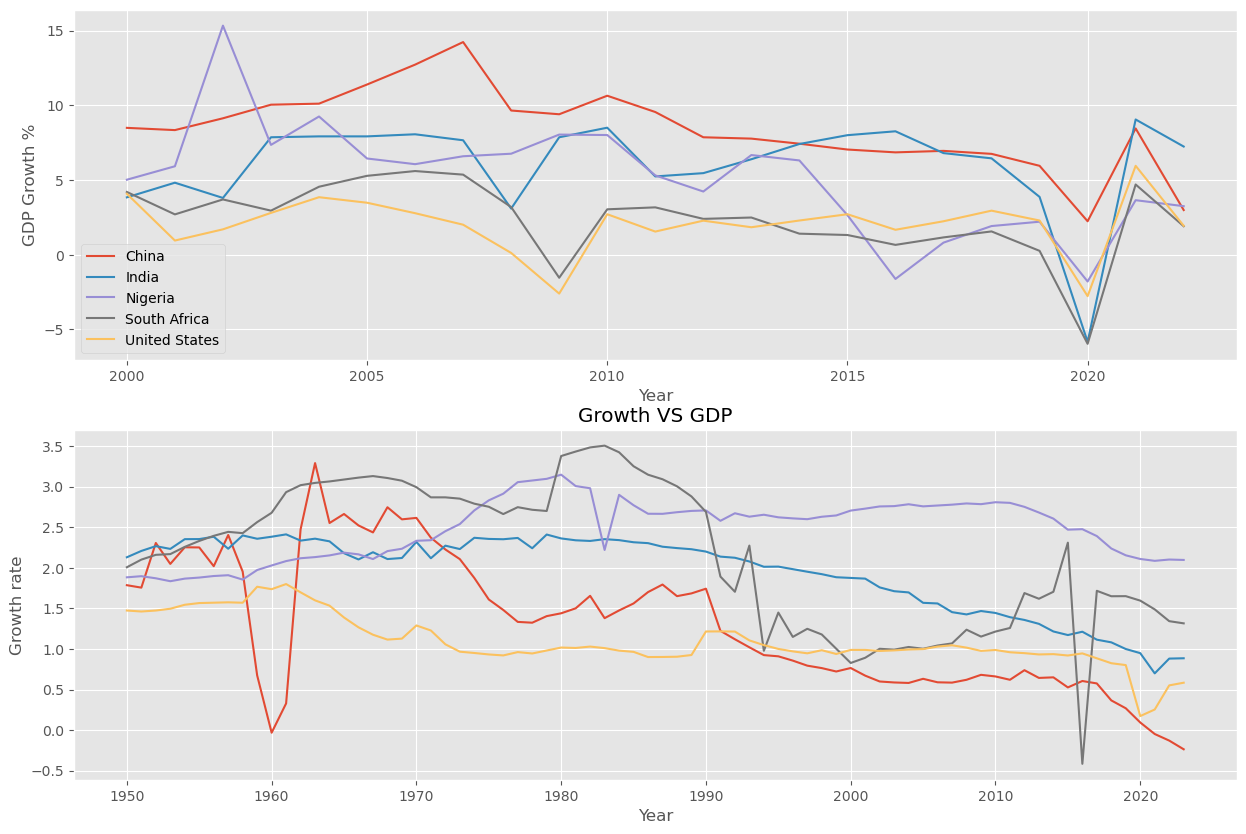

In [183]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
ax[0].set_xlabel('Year')
ax[0].set_ylabel('GDP Growth %')
ax[0].plot(GDP_countries,label=GDP_countries.columns)
ax[0].legend()

ax[1].set_xlabel('Year')
ax[1].set_ylabel('Growth rate')
ax[1].plot(Growth_rates_countries,label=Growth_rates_countries.columns)
plt.title('Growth VS GDP')

plt.show()


It should be noted that the growth rate graph is taken over a much longer interval.
That’s because a large population increase does not have an immediate impact — it plays out over 20–30 years.

Nigeria's dominance in the years prior to COVID is notable, probably related to the oil industry.
More importantly, there is a clear population decline in all countries except Nigeria.
Much is said about China’s commercial dominance, but internally they have serious issues — hyperdensity in some areas and large concentrations of elderly in others.
Let’s look at more general data.

In [33]:
Mundial=Growth_rates[Growth_rates['Entity']=='World']
Low_income=Growth_rates[Growth_rates['Entity']=='Low-income countries']

In [34]:
Mundial=Mundial.pivot(index='Year',columns='Entity' ,values='growth_rate__sex_all__age_all__variant_estimates')
Low_income=Low_income.pivot(index='Year',columns='Entity' ,values='growth_rate__sex_all__age_all__variant_estimates')

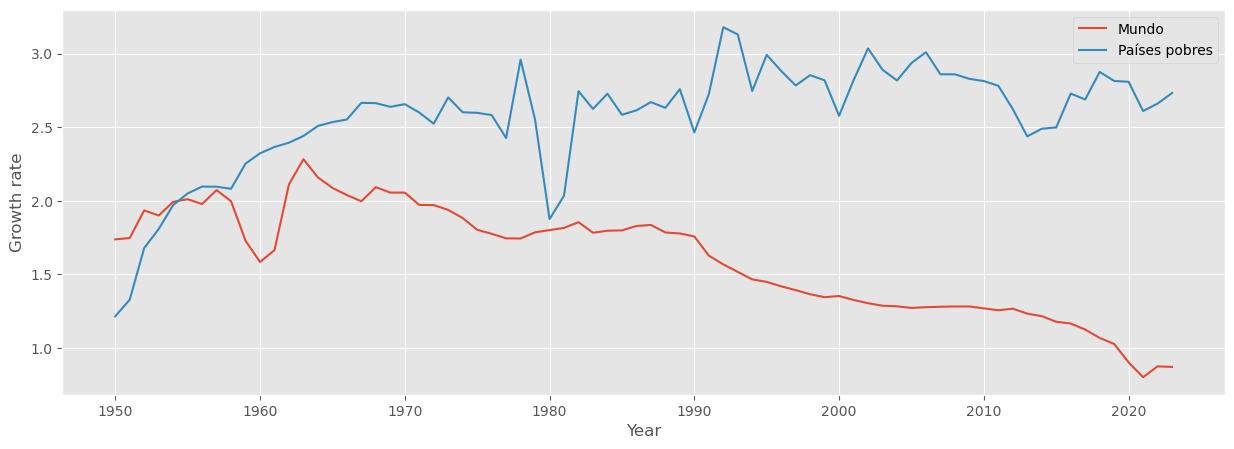

In [185]:
plt.figure(figsize=(15,5))
plt.plot(Mundial,label='Mundo')
plt.plot(Low_income,label='Países pobres')
plt.xlabel('Year')
plt.ylabel('Growth rate')
plt.legend()

plt.show()

The suspicions are confirmed: growth is slowing down, and the only countries contributing to population growth are the poorer ones.
This will lead either to exponential development in those countries or to levels of emigration never seen before.
Due to my lack of information, I’ve relied heavily on internet research. Of the selected assets, the only ones I was familiar with were the index ETFs.

# Asset Selection for the Portfolio

## United States Assets

### 1. **S&P 500 ETF (SPY)**
- **What it is**: Tracks the performance of the S&P 500.
- **Why?**: SPY offers broad exposure to the U.S. stock market, representing the largest and most influential companies in the economy. I chose this one over others like Vanguard's more or less at random.

### 2. **Lockheed Martin (LMT)**
- **What it is**: Lockheed Martin (LMT) is a leading defense contractor involved in aviation, defense, and security.
- **Why?**: I'm looking for something that gives me exposure to a potential war and that in some way represents the military power of the U.S.

### 3. **Invesco QQQ Trust (QQQ)**
- **What it is**: This is an ETF that tracks the performance of the NASDAQ-100 index, composed of 100 of the largest non-financial companies listed on NASDAQ, with a strong focus on technology.
- **Why?**: For greater exposure to the technology sector.

## China Assets

It's important to note that there is no full access to the Chinese market.

### 4. **iShares MSCI All China Index ETF (CNYA)**
- **What it is**: An ETF that tracks a broad range of Chinese securities, including both A-shares and B-shares of Chinese companies.
- **Why?**: CNYA offers diversified exposure to China's economy. As your presentation points out, China is a growing market, and I believe it’s a sensible decision to include or consolidate potential growth into a single asset.

### 5. **iShares Global Clean Energy ETF (ICLN)**
- **What it is**: An ETF focused on investing in global companies involved in clean and alternative energy production. Although it does not focus exclusively on China, it includes important Chinese renewable energy companies like BYD and JinkoSolar.
- **Why?**: China’s success goes hand in hand with its plans for energy and infrastructure. They practically hold a monopoly on energy, especially solar. In the end, it’s like investing in China.

## India Assets

### 6. **iShares MSCI India ETF (INDA)**
- **What it is**: An ETF that tracks the performance of the MSCI India Index, which includes large and mid-cap companies from India.
- **Why?**: We seek exposure to India due to the population-based argument made earlier. Again, these types of indices offer the best exposure.

### 7. **Larsen & Toubro (LT)**
- **What it is**: Larsen & Toubro is an Indian multinational involved in construction, engineering, technology, and defense.
- **Why?**: LT plays a key role in infrastructure development in India, an area expected to see significant growth. Population implies infrastructure.

### 8. **Hindustan Zinc (HCC)**
- **What it is**: Hindustan Zinc is a major producer of zinc, silver, and other non-ferrous metals and is part of the Vedanta Group.
- **Why?**: As a key player in India’s mining sector, Hindustan Zinc benefits from both domestic demand and global commodity prices. I was curious about getting a bit of exposure to raw materials.

## Africa Assets

### 9. **iShares MSCI All Africa ex South Africa ETF (AFK)**
- **What it is**: An ETF that offers exposure to African markets, excluding South Africa, including countries like Nigeria, Kenya, Egypt, and Morocco.
- **Why?**: Again, exposure based on our hypothesis.

### 10. **Sibanye Stillwater (SBSW)**
- **What it is**: The leading mining company in South Africa.
- **Why?**: Due to the clear lack of development, there is limited access to the African market. In fact, there’s barely an economy, so to speak — the few notable countries are South Africa, Kenya, and Nigeria. When searching online, I found many American companies operating in Africa, usually in raw materials. But we’re looking for companies of African origin.

### 11. **Growthpoint Properties (GRT)**
- **What it is**: A real estate investment trust based in South Africa, focused on commercial and industrial properties in South Africa and other regions of sub-Saharan Africa.
- **Why?**: I believe a key factor will be who develops Africa’s real estate infrastructure. So far, this is the only company based in South Africa that I’ve found.

---

## Conclusion

Several assets have been selected based on the current U.S. interest rate environment, seeking exposure not only to the U.S. and Chinese markets but also speculating on what could happen considering the global population decline and how this might impact current powers.




In [189]:
tickers=['SPY','LMT','QQQ','CNYA','ICLN','INDA','LT.NS','HCC','AFK','GRT.JO','SBSW']
data=yf.download(tickers,auto_adjust=False)['Adj Close']

[*********************100%***********************]  11 of 11 completed


<Axes: >

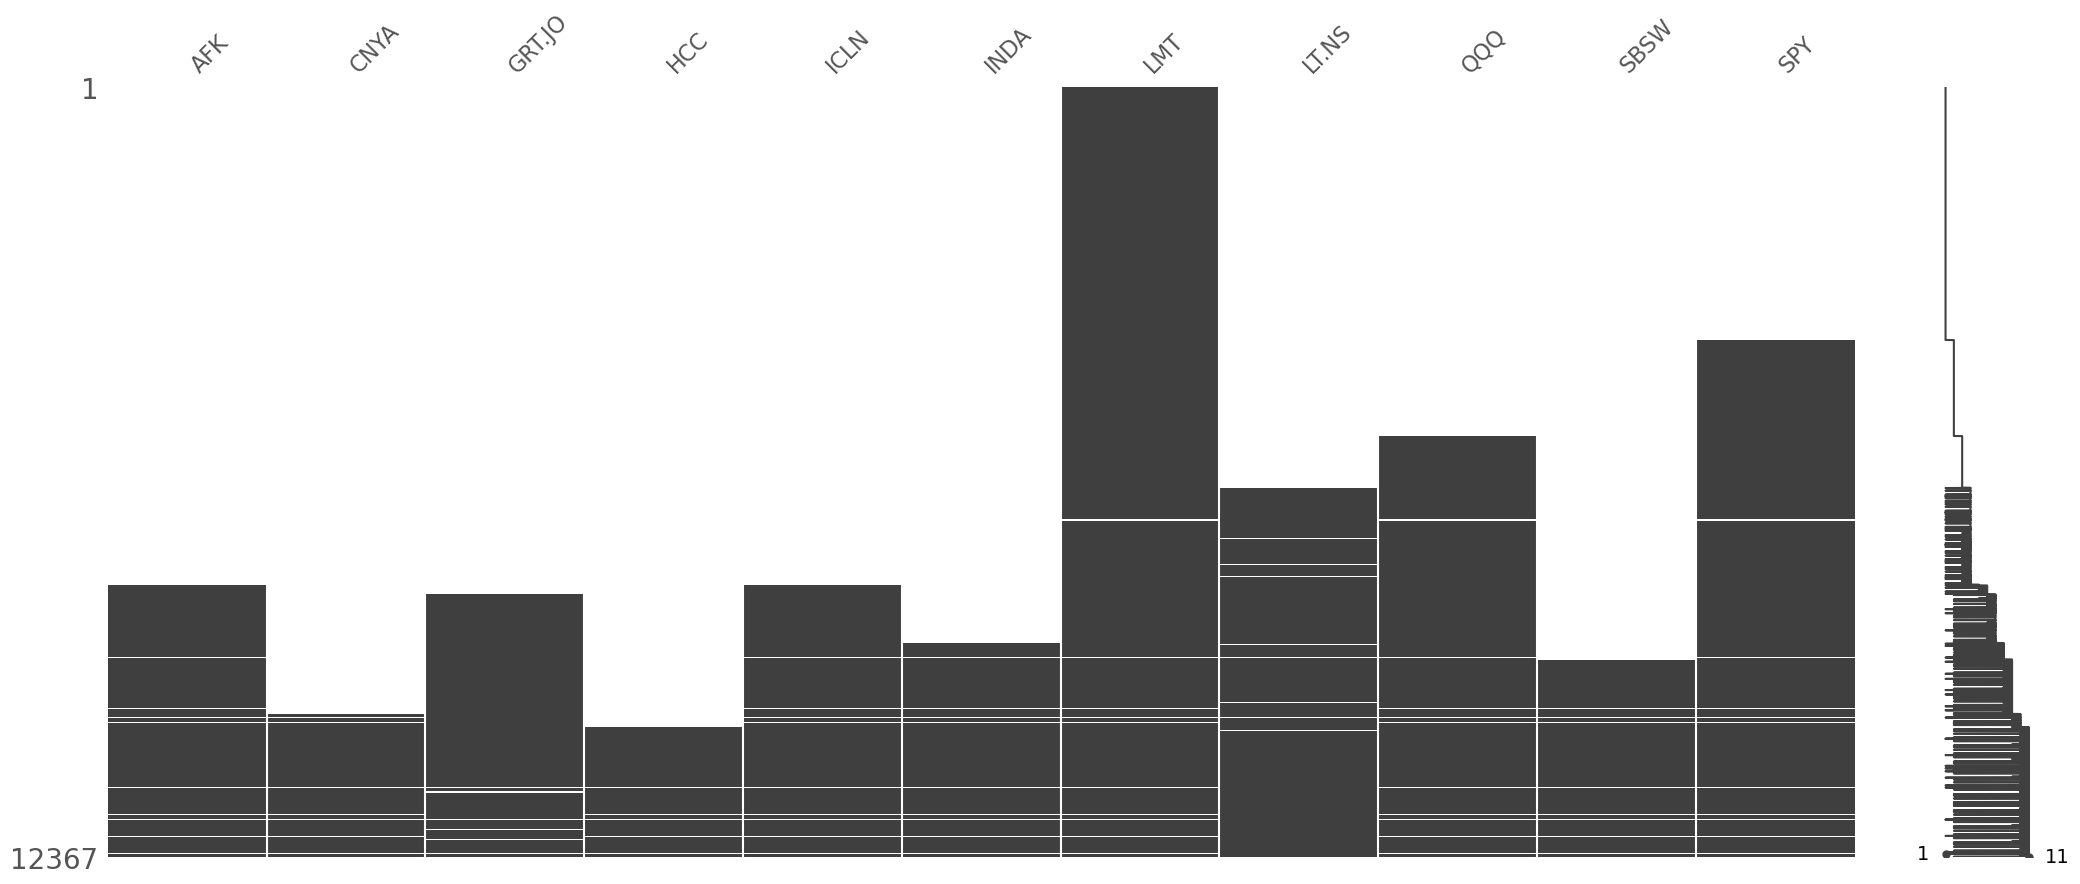

In [191]:
import missingno as mso
mso.matrix(data)

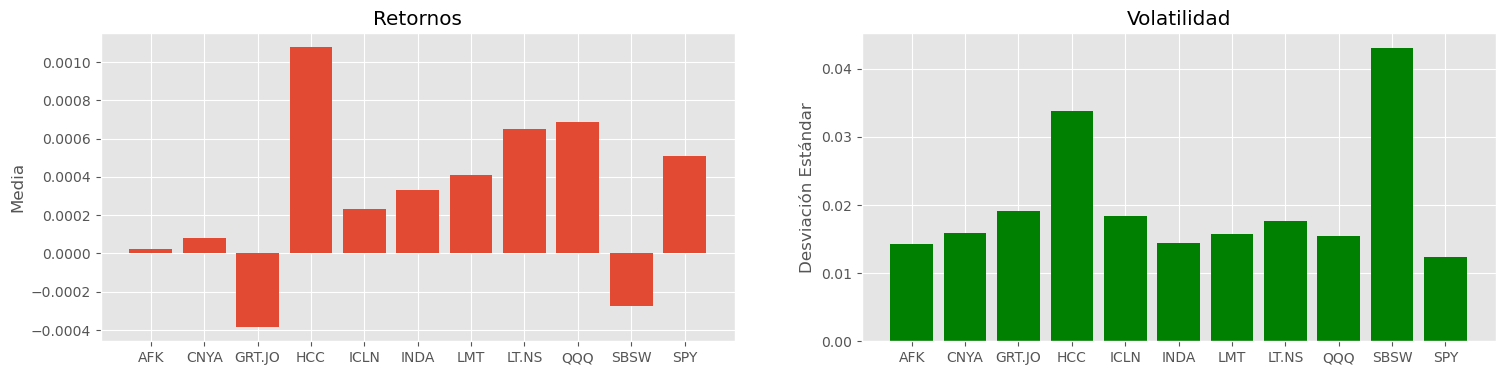

In [193]:

data=data.dropna(axis=0,how='any')
retornos=np.log(data).diff().dropna()
medias=retornos.mean()
std=retornos.std()
# Crear una figura con dos subplots, uno encima del otro
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

# Crear el gráfico de barras de los valores medios en la parte superior
axes[0].bar(medias.index, medias.values)
axes[0].set_ylabel('Media')
axes[0].set_title('Retornos')

# Crear el gráfico de barras de los valores de desviación estándar en la parte inferior
axes[1].bar(std.index, std.values,color='green')
axes[1].set_ylabel('Desviación Estándar')
axes[1].set_title('Volatilidad')


## Data Adjustment

We’ve done some analysis attempting to justify why certain assets would be selected, but when it comes to actually optimizing, we’re going to change things a bit to make it more interesting. If we were talking about conservative strategies, I believe putting all your money in the global index is the best option — but here, we want less monotonous data.

We’re removing those with negative returns and adding several different stocks with high volatility and large returns to make things more engaging. Additionally, since I’ll be focusing the portfolio on a risk-parity approach, it’s actually better to start with disparities in volatility.


In [195]:
tickers=['SPY','LMT','QQQ','CNYA','ICLN','INDA','LT.NS','AFK','HMY','BTC-USD','TCEHY','TSLA','NVDA','MRNA']
data=yf.download(tickers,auto_adjust=False)['Adj Close']
assets=data.columns

[*********************100%***********************]  14 of 14 completed


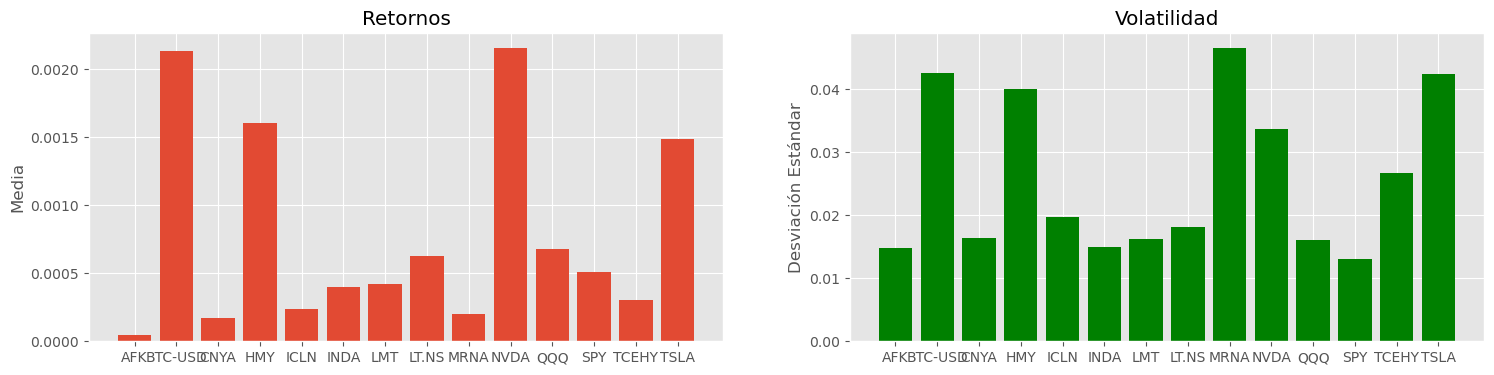

In [ ]:
data=data.dropna(axis=0,how='any')
retornos=np.log(data).diff().dropna()
medias=retornos.mean()
std=retornos.std()

fig, axes = plt.subplots(1, 2, figsize=(18, 4))


axes[0].bar(medias.index, medias.values)
axes[0].set_ylabel('Media')
axes[0].set_title('Retornos')


axes[1].bar(std.index, std.values,color='green')
axes[1].set_ylabel('Desviación Estándar')
axes[1].set_title('Volatilidad')


## Weights selection
These are the functions for the different kinds of portfolio optimizations I know.

In [ ]:
def cartera_min_vol (ret):
    
    
    if isinstance(ret, pd.DataFrame): 
    
        num_act = ret.shape[1]
        matriz_cov = ret.cov().to_numpy()
        
            
        pesos = cp.Variable(num_act)
        
        
        constraints = [pesos >= 0,
                    cp.sum(pesos) == 1,
                    ]
        
        riesgo = cp.quad_form(pesos, matriz_cov) 
        objective = cp.Minimize(riesgo) 

        
        prob = cp.Problem(objective, constraints)
        resultado = prob.solve(solver='ECOS')

        pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value]) #Pongo a cero los pesos menores a 10^-4 y redondeo a 3 decimales

        return pesos_ajustados
    
    else:
        
        raise ValueError('Please, DF as an argument') # Si el argumento no es un DataFrame, lanzo un error


def cartera_max_sharpe(ret, ret_rf):
    

    
    if isinstance(ret, pd.DataFrame):
    
        num_act = ret.shape[1]
        matriz_cov = ret.cov().to_numpy()
        retornos_esperados = ret.mean()

        
        x = cp.Variable(num_act)
        
        riesgo = cp.quad_form(x, matriz_cov)

        
        pi = np.array(retornos_esperados - ret_rf)

        
        constraints = [pi @ x ==1, 
                    x>=0]       

        objective = cp.Minimize(riesgo) 

        
        problema = cp.Problem(objective, constraints)        

        
        resultado  = problema.solve(solver='ECOS')

        
        pesos = x.value
        pesos /= pesos.sum()

        pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos])

        return pesos_ajustados
    
    else:
        raise ValueError('Use a DF :_(')

def cartera_min_cvar(ret, alpha=0.5):
    

    
    if isinstance(ret, pd.DataFrame): 
        retornos = ret.to_numpy()
        retornos_esperados = ret.mean().to_numpy()
        
        num_data, num_act = retornos.shape 
        
        pesos = cp.Variable(num_act)
        t = cp.Variable()  
        ui = cp.Variable(num_data) 

        riesgo = t + cp.sum(ui)/(alpha * num_data)  
        retornos_cartera = retornos_esperados.T @ pesos
        
        restricciones = [
            -retornos @ pesos - t - ui <= 0,  
            ui >= 0,  
            cp.sum(pesos) == 1,
            pesos >= 0,  
        ]
        
        objective = cp.Minimize(riesgo)

        
        prob = cp.Problem(objective, restricciones)
        cvar95_min_cvar = prob.solve(solver='ECOS')
        
        pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value]) #Pongo a cero los pesos menores a 10^-4 y redondeo a 3 decimales

        return pesos_ajustados
        
    else:
        raise ValueError('Use a DF')


def cartera_max_drawdown(ret, alpha=0.5):
    

    
    if isinstance(ret, pd.DataFrame): 
        retornos = ret.to_numpy()
        retornos_esperados = ret.mean().to_numpy()
        
        num_data, num_act = retornos.shape 
        
        pesos = cp.Variable(num_act)
        t = cp.Variable()
        uj = cp.Variable(num_data)
        dj = cp.Variable(num_data+1)

        riesgo = t + cp.sum(uj)/(alpha * num_data)
        

        restricciones = [dj[1:] - t - uj <= 0,
                        dj[1:] >= dj[:-1] - retornos @ pesos,
                        uj >= 0,
                        dj >= 0,
                        dj[0] == 0,
                        cp.sum(pesos) == 1,
                        pesos >= 0,
                    ]

        objective = cp.Minimize(riesgo)

        
        prob = cp.Problem(objective, restricciones)
        prob.solve(solver='ECOS')

        pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value]) #Pongo a cero los pesos menores a 10^-4 y redondeo a 3 decimales

        return pesos_ajustados
        
    else:
        raise ValueError('Use a DF')

In [ ]:
pesos_carteras_df = pd.DataFrame()

pesos_carteras_df['min_vol'] = cartera_min_vol (retornos)

rf = 0.04/252 
pesos_carteras_df['sharpe'] = cartera_max_sharpe(retornos, rf)

pesos_carteras_df['CVar'] = cartera_min_cvar(retornos)

pesos_carteras_df['Max_DD'] = cartera_max_drawdown(retornos)

pesos_carteras_df['Equal'] = np.ones(len(assets))/len(assets)

C:\Users\Manuel\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


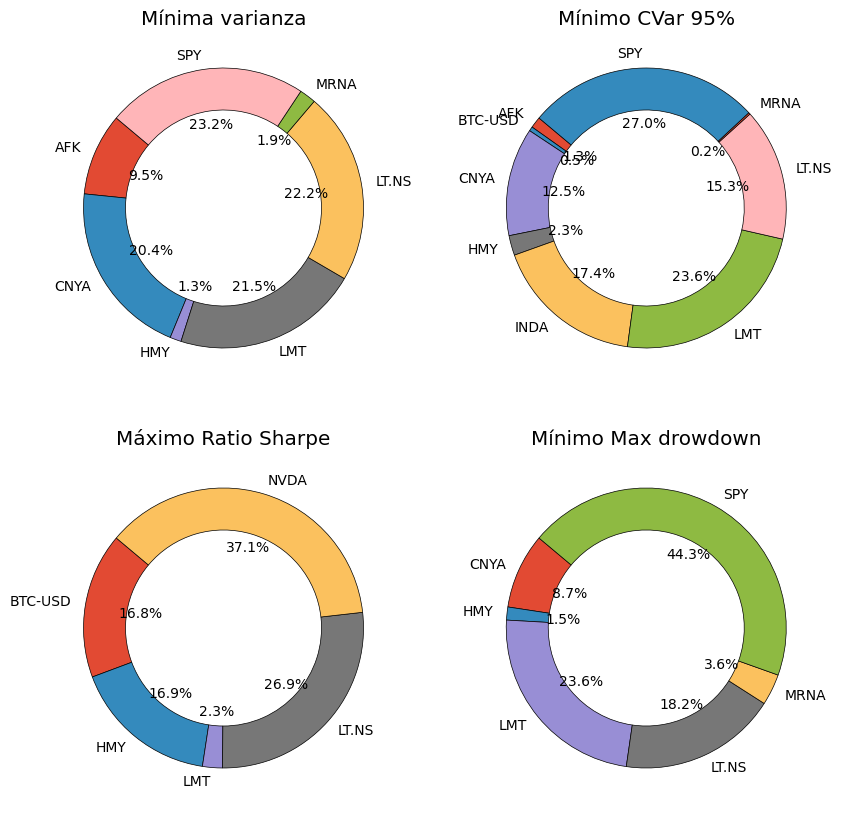

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(10,10))

ax[0,0].pie([x for x in pesos_carteras_df['min_vol'] if x > 0], labels=[asset for i, asset in enumerate(assets) if pesos_carteras_df['min_vol'][i] > 0], autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})
ax[0,0].set_title('Min Var')
ax[1,0].pie([x for x in pesos_carteras_df['sharpe'] if x > 0], labels=[asset for i, asset in enumerate(assets) if pesos_carteras_df['sharpe'][i] > 0], autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})
ax[1,0].set_title('Max Sharpe Ratio')

ax[0,1].pie([x for x in pesos_carteras_df['CVar'] if x > 0], labels=[asset for i, asset in enumerate(assets) if pesos_carteras_df['CVar'][i] > 0], autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})
ax[0,1].set_title('Min CVar 95%')
ax[1,1].pie([x for x in pesos_carteras_df['Max_DD'] if x > 0], labels=[asset for i, asset in enumerate(assets) if pesos_carteras_df['Max_DD'][i] > 0], autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})
ax[1,1].set_title('Min Max drowdown')


plt.show()

It's interesting to see how the intention behind each portfolio is clearly reflected in the asset selection. BTC disappears as soon as we take volatility into account — it's quite surprising that it shows up in the minimum CVaR portfolio, considering those tails must be extremely heavy. Although it's true that its VaR is already quite far to the left on its own.

As I mentioned before, I believe that in the long term, the risk-parity approach is better, since it maximizes diversification and sets a fixed level of risk. Ideal for passive investors like myself.


In [49]:
def marginal_risk_contrib (p, cov_m):
    '''
    p: vector de pesos
    cov_m: matriz de covarianzas
    '''
    sigma_p = np.sqrt(p @ cov_m @ p)
    return cov_m @ p / sigma_p
def risk_contrib(p, cov_m):
    '''
    p: vector de pesos
    cov_m: matriz de covarianzas
    '''
    mrc = marginal_risk_contrib(p, cov_m)
    return p * mrc


In [ ]:
num_datos, num_activos = retornos.shape

Sigma = retornos.cov().to_numpy()
mu = retornos.mean().to_numpy().reshape(-1,1)


b = 1/num_activos
x = cp.Variable((num_activos, 1))
gamma = cp.Variable((num_activos, 1), nonneg=True)
psi = cp.Variable(nonneg=True)

z = Sigma @ x

obj = cp.pnorm(b**0.5 * psi - gamma, p=2)
ret = mu.T @ x

constraints = [cp.sum(x) == 1,
               x >= 0,
               cp.SOC(psi, sqrtm(Sigma) @ x),
               # ret >= 0.0006,
               ]

for i in range(num_activos):
    constraints += [cp.SOC(x[i,0] + z[i,0],
                           cp.vstack([2*gamma[i:i+1], x[i:i+1] - z[i:i+1]]))
                    ]

objective = cp.Minimize(obj * 1000)
prob = cp.Problem(objective, constraints)
prob.solve(solver='ECOS')

pesos_rp = pd.DataFrame(x.value, index=assets)

In [51]:
Sigma=pd.DataFrame(Sigma)
Sigma.index=assets
Sigma.columns=assets

In [101]:
pesos_carteras_df.index=assets

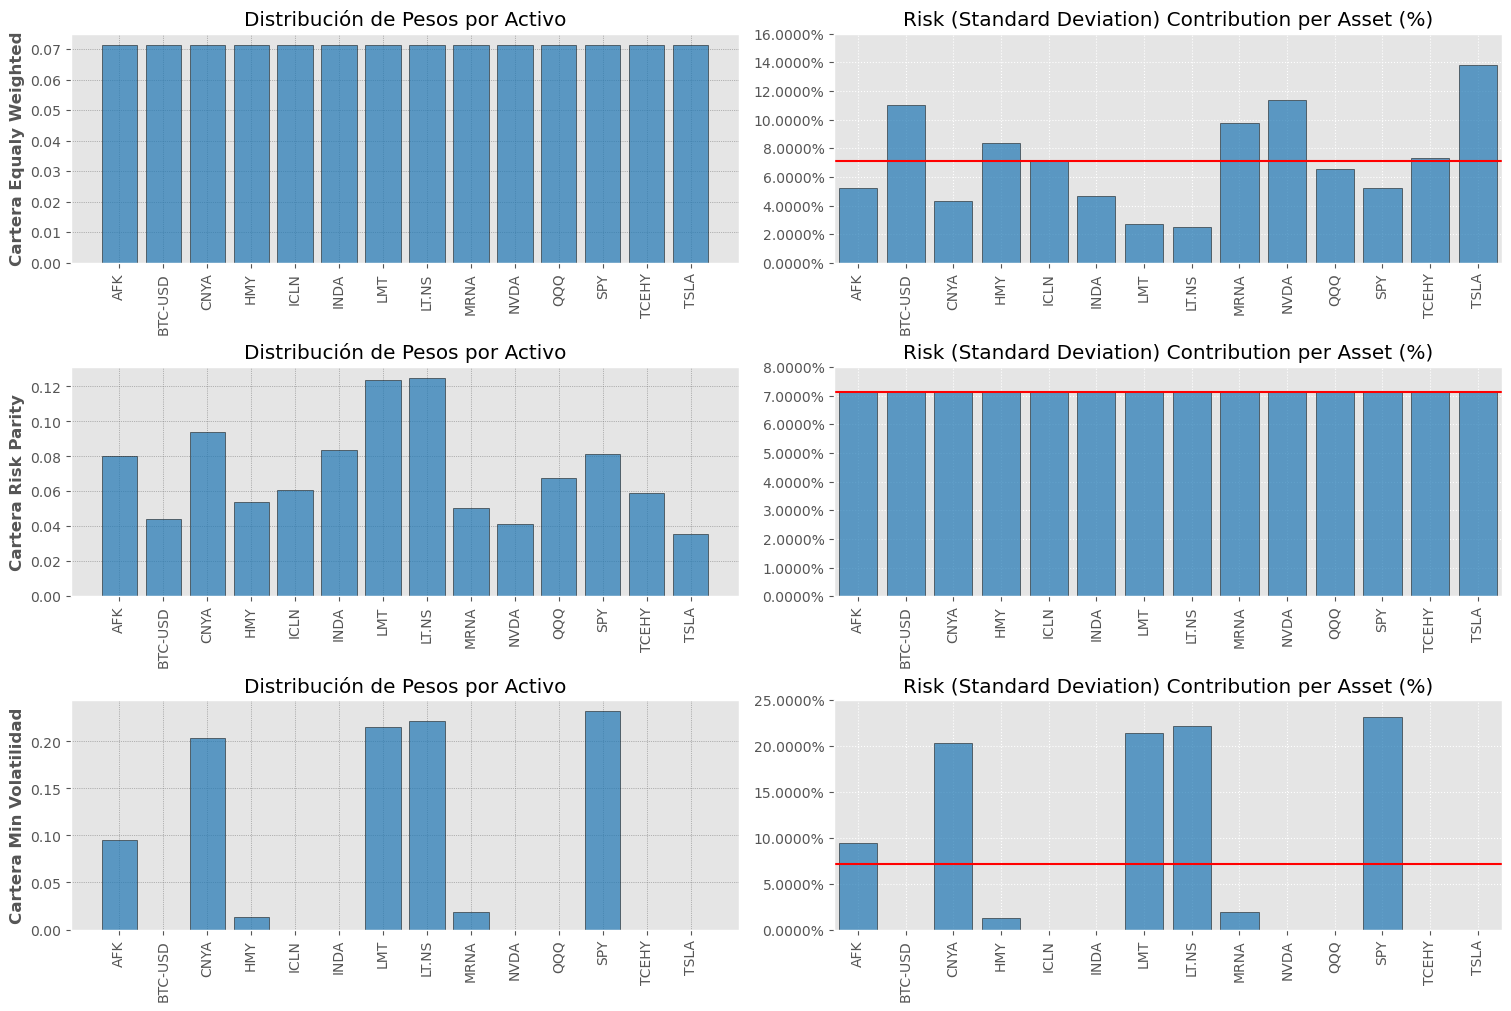

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

axs[0, 0].bar(assets, pesos_carteras_df['Equal'], color='tab:blue', alpha=0.7, edgecolor='black')


axs[0, 0].set_xticks(np.arange(len(assets)))
axs[0, 0].set_xticklabels(assets, rotation=90)


axs[0,0].grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')


axs[0, 0].set_title('Distribución de Pesos por Activo')
axs[0, 0].set_ylabel('Cartera Equaly Weighted', fontsize=12, fontweight='bold')

ax = rp.plot_risk_con(w=pesos_carteras_df['Equal'],
                      cov=Sigma,
                      returns=retornos,
                      rm='MV',
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      percentage=True,
                      t_factor=252,
                      ax=axs[0, 1])



axs[1, 0].bar(assets, pesos_rp.values[:,0], color='tab:blue', alpha=0.7, edgecolor='black')


axs[1, 0].set_xticks(np.arange(len(assets)))
axs[1, 0].set_xticklabels(assets, rotation=90)


axs[1,0].grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')


axs[1, 0].set_title('Distribución de Pesos por Activo')
axs[1, 0].set_ylabel('Cartera Risk Parity', fontsize=12, fontweight='bold')

ax = rp.plot_risk_con(w=pesos_rp,
                      cov=Sigma,
                      returns=retornos,
                      rm='MV',
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      percentage=True,
                      t_factor=252,
                      ax=axs[1, 1])



axs[2, 0].bar(assets, pesos_carteras_df['min_vol'], color='tab:blue', alpha=0.7, edgecolor='black')


axs[2, 0].set_xticks(np.arange(len(assets)))
axs[2, 0].set_xticklabels(assets, rotation=90)


axs[2,0].grid(True, which='both', linestyle=':', linewidth=0.5, color='gray')


axs[2, 0].set_title('Distribución de Pesos por Activo')
axs[2, 0].set_ylabel('Cartera Min Volatilidad', fontsize=12, fontweight='bold')

ax = rp.plot_risk_con(w=pesos_carteras_df['min_vol'],
                      cov=Sigma,
                      returns=retornos,
                      rm='MV',
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      percentage=True,
                      t_factor=252,
                      ax=axs[2, 1])

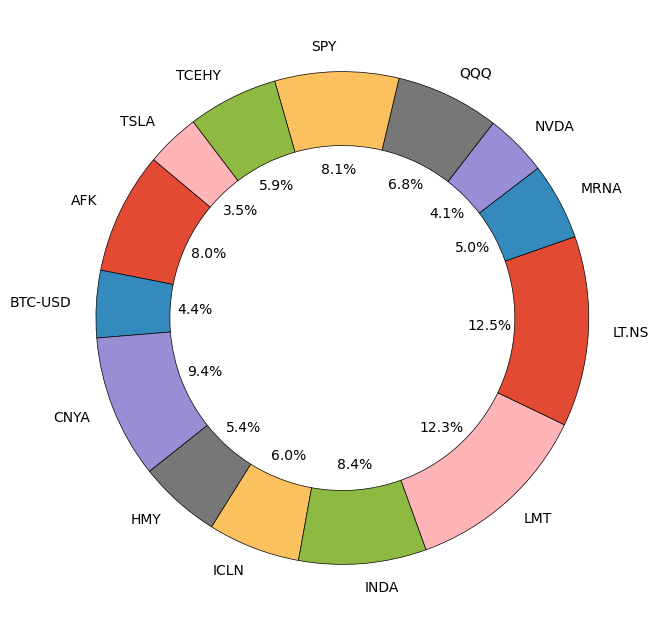

In [201]:
plt.figure(figsize=(8,8))

plt.pie(pesos_rp[0], labels=assets, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

plt.show()

Let's draw the cummulative returns

In [107]:
retornos_carteras = retornos.values @ pesos_carteras_df
Cartera_real=retornos.values @ pesos_rp
retornos_carteras_df = pd.DataFrame(retornos_carteras)
retornos_carteras_df['Portfolio']=Cartera_real
retornos_carteras_df.index = retornos.index

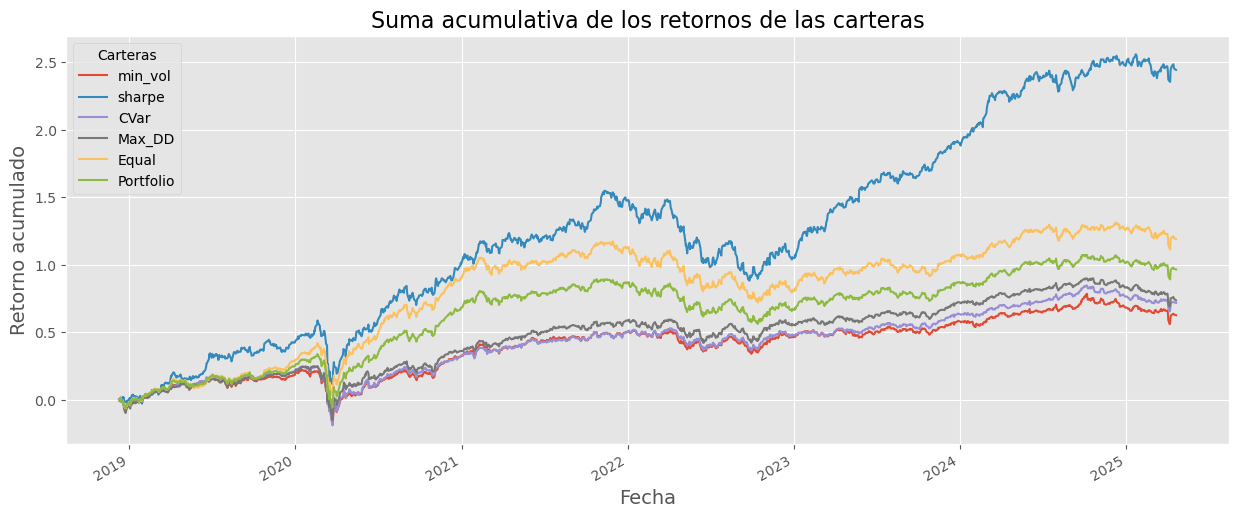

In [ ]:

cumulative_returns = retornos_carteras_df.cumsum()

fig, ax = plt.subplots(figsize=(15, 6))  


cumulative_returns.plot(ax=ax)


ax.set_title('Cummulative Returns', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Return', fontsize=14)


ax.legend(title='Carteras')


plt.style.use('ggplot')


plt.show()

In a way, it’s to be expected. The portfolio with the highest Sharpe ratio will have higher returns by definition. It’s important to note the similarity with the equally weighted portfolio; however, our idea has been to diversify volatility as much as possible so that each asset contributes equally to the portfolio. If Tesla or Bitcoin drop, the equally weighted portfolio will suffer much more than ours.


## Indicator estimation

In [111]:
world=yf.download('^990100-USD-STRD', start='2018-12-10',auto_adjust=False)['Adj Close']
world_returns=np.log(world).diff().dropna()
SP500=yf.download('^GSPC', start='2018-12-10',auto_adjust=False)['Adj Close']
SP500_returns=np.log(SP500).diff().dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


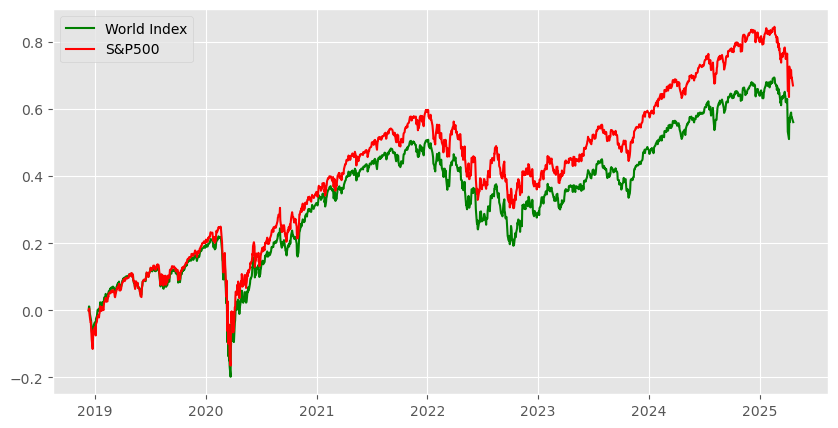

In [112]:
plt.figure(figsize=(10,5))
ay=world_returns.cumsum()
ayiyi=SP500_returns.cumsum()
plt.plot(ay,color='green',label='World Index')
plt.plot(ayiyi,color='red', label='S&P500')
plt.legend()
plt.show()

We’re going to use the global index as a reference, since it clearly follows the same trends as the S&P 500, albeit slightly softened during bullish periods. Additionally, our portfolio has significant exposure to assets outside the U.S.


In [114]:
Cartera_real.shape , world_returns.shape

((1519, 1), (1595, 1))

In [115]:
rendimientos_regre=pd.concat([world_returns,retornos_carteras_df['Portfolio']], join='inner', axis=1)

In [ ]:
X = rendimientos_regre['^990100-USD-STRD'] 
y = rendimientos_regre['Portfolio'] 
X_sm = sm.add_constant(X)  


modelo = sm.OLS(y, X_sm).fit()

In [117]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              Portfolio   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     3589.
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:05:40   Log-Likelihood:                 5415.5
No. Observations:                1512   AIC:                        -1.083e+04
Df Residuals:                    1510   BIC:                        -1.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0004      0.000  

### We obtained:

**$\beta = 0.9229$**. It is statistically significant. Financially, this tells us that our portfolio follows market trends but with less intensity. Note that we are very close to $1$, which indicates behavior very similar to the market.

**$\alpha = 0.0004$**. It is not statistically significant, since the $p$-value is greater than $0.001$.

**$R^2 = 0.704$**. The model fits well, explaining $70\%$ of the variability.



### Let's proceed with Fama and French

We will use three factors and do it both daily and monthly. We will have a clear mismatch with the available data, which may lead to unsatisfactory results. Note that to do it monthly, we need to download the monthly data; if we were to concatenate with the daily data, we would be mixing different types of measurements.


In [120]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m')
ff_month=pd.read_csv('F-F_Research_Data_Factors.CSV',index_col=0,parse_dates=True,date_parser=dateparse )
data_month=yf.download(['SPY','LMT','QQQ','CNYA','ICLN','INDA','LT.NS','AFK','HMY','BTC-USD','TCEHY','TSLA','NVDA','MRNA'],start='2019-01-01', interval='1mo',auto_adjust=False)['Adj Close']
retornos_month=np.log(data_month).diff().dropna()

[*********************100%***********************]  14 of 14 completed


In [121]:
Portfolio_month=retornos_month.values@ pesos_rp
Portfolio_month.index=retornos_month.index
Portfolio_month.columns=['Portfolio']

In [122]:
FF_data=pd.concat([ff_month/100,Portfolio_month],join='inner',axis=1)

In [123]:
FF_data.head(2)

,Mkt-RF,SMB,HML,RF,Portfolio
2019-02-01,0.034,0.0206,-0.0271,0.0018,0.047703
2019-03-01,0.011,-0.0305,-0.0412,0.0019,0.017640


In [124]:
Y = FF_data.loc[:, 'Portfolio']-FF_data['RF']
X = FF_data[['Mkt-RF', 'SMB', 'HML']]

X = sm.add_constant(X)

modelo = sm.OLS(Y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     80.95
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           3.08e-22
Time:                        12:05:42   Log-Likelihood:                 160.72
No. Observations:                  71   AIC:                            -313.4
Df Residuals:                      67   BIC:                            -304.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.003      0.640      0.5

The only significant factor is **Mkt-RF**, the asset's sensitivity to the market. In line with the previous beta, we see that our portfolio softens market movements but follows a similar trend.

Note the strong $R^2$ we obtain. We explain around $77\%$ of the variance in the portfolio's returns with these three factors.


In [126]:
ff_daily=pd.read_csv('F-F_Research_Data_Factors_daily.CSV',parse_dates=True,index_col=0 )
FF_data=pd.concat([ff_daily/100,retornos_carteras_df['Portfolio']],join='inner',axis=1)
Y = FF_data.loc[:, 'Portfolio']-FF_data['RF']
X = FF_data[['Mkt-RF', 'SMB', 'HML']]

X = sm.add_constant(X)

modelo = sm.OLS(Y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1037.
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:05:42   Log-Likelihood:                 5159.4
No. Observations:                1450   AIC:                        -1.031e+04
Df Residuals:                    1446   BIC:                        -1.029e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.186      0.2

Using daily data may introduce noise — in fact, we explain less of the variability in our returns. However, we have obtained statistical evidence of the relationship with other factors.

##### **Mkt-RF: 0.7539**
The asset's sensitivity to the market is still below 1. This lower value can be attributed to the higher variability in daily data.

##### **SMB: 0.0935**
We have a positive, near-zero beta. This suggests we have a good balance between large and small companies.

##### **HML: -0.08**
We have a negative, near-zero beta. This suggests the portfolio behaves more like a growth stock than a value stock, although once again, we seem to have a good balance.



Checking on industry factors is pretty pointless but let's do it regardless.

In [129]:
FF_data=pd.concat([ff_month/100,Portfolio_month],join='inner',axis=1)
industry=pd.read_csv('5_Industry_Portfolios.CSV',parse_dates=True,index_col=0,date_parser=dateparse)
industry_data=pd.concat([industry/100,Portfolio_month],join='inner',axis=1)
industry_data['RF']=FF_data['RF']
Y = industry_data.loc[:, 'Portfolio']-industry_data['RF']
X = industry_data[['Cnsmr', 'Manuf', 'HiTec','Hlth ','Other']]

X = sm.add_constant(X)

modelo = sm.OLS(Y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     47.17
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           2.45e-20
Time:                        12:05:42   Log-Likelihood:                 160.74
No. Observations:                  71   AIC:                            -309.5
Df Residuals:                      65   BIC:                            -295.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.003     -0.248      0.8

Accordingly with our selection.

### Backtesting
We do not have enough data, but there are two periods of time where we had specific tendencies.

In [132]:
world_bear=world_returns['2022-01-01':'2023-01-01']
world_bull=world_returns['2023-01-01':'2025-01-01']
Portfolio_bear=retornos_carteras_df['Portfolio']['2022-01-01':'2023-01-01']
Portfolio_bull=retornos_carteras_df['Portfolio']['2023-01-01':'2025-01-01']

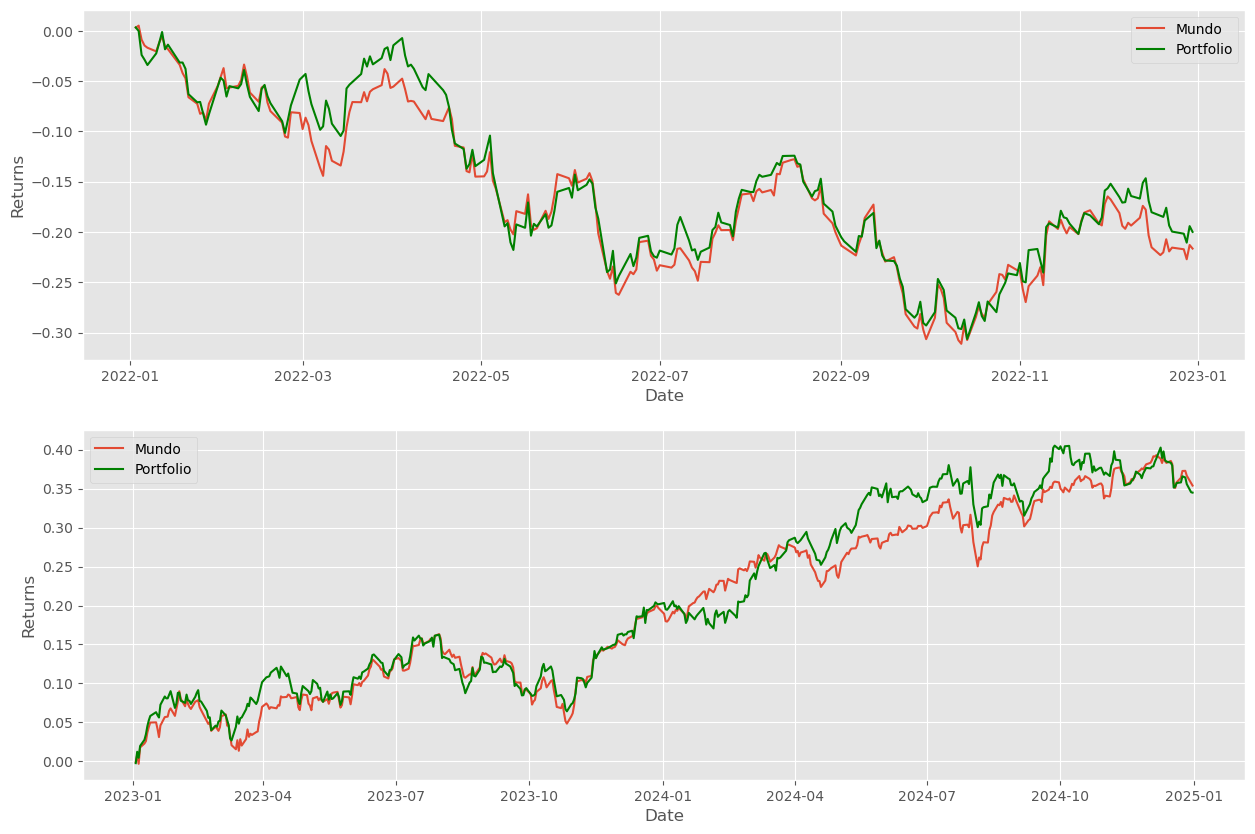

In [205]:
fig,ax=plt.subplots(2,1,figsize=(15,10))


ax[0].set_xlabel('Date')
ax[0].set_ylabel('Returns')
ax[0].plot(world_bear.index,world_bear.cumsum(),label='Mundo')
ax[0].plot(Portfolio_bear.index,Portfolio_bear.cumsum(),color='green',label='Portfolio')
ax[0].legend()

ax[1].set_xlabel('Date')
ax[1].set_ylabel('Returns')
ax[1].plot(world_bull.index,world_bull.cumsum(),label='Mundo')
ax[1].plot(Portfolio_bull.index,Portfolio_bull.cumsum(),color='green',label='Portfolio')
ax[1].legend()
plt.show()

Due to the approach we've followed from the beginning, these visuals don't surprise us too much. Perhaps it's worth noting that we seem to withstand crisis periods better than the global index. These are just visual assumptions — we have indicators for this.

Let’s calculate the **Bull Beta** and the **Bear Beta**.


In [135]:
Bull=pd.concat([world_bull,Portfolio_bull], join='inner', axis=1)
covadonga=np.cov(Bull['^990100-USD-STRD'],Bull['Portfolio'])[0,1]
var=world_bull.var()
bull_beta=covadonga/var[0]
bull_beta

0.9455261871968684

Less performance than the market :(

In [137]:
Bear=pd.concat([world_bear,Portfolio_bear], join='inner', axis=1)
covadonga=np.cov(Bear['^990100-USD-STRD'],Bear['Portfolio'])[0,1] # Esto devuelve matriz asi que nos quedamos con cualquier no diagonal
var=world_bear.var()
bear_beta=covadonga/var[0]
bear_beta

0.9823387333934851

Our suspicions were correct — this beta below $1$ indicates that we perform better than the market during downturns. The portfolio we’ve built is certainly conservative.


In [208]:
print("Los rendimientos esperados en etapas de crecimiento son:")
print(f" Mundo: {world_bull.mean()[0]*100:.4%}")
print(f" Portfolio: {Portfolio_bull.mean()*100:.4%}")
print("Los rendimientos esperados en etapas de recesión son:")
print(f" Mundo: {world_bear.mean()[0]*100:.4%}")
print(f" Portfolio: {Portfolio_bear.mean()*100:.4%}")
print("Los rendimientos esperados en general son:")
print(f" Mundo: {world_returns.mean()[0]*100:.4%}")
print(f" Portfolio: {retornos_carteras_df['Portfolio'].mean()*100:.4%}")

Los rendimientos esperados en etapas de crecimiento son:
 Mundo: 7.0496%
 Portfolio: 7.2602%
Los rendimientos esperados en etapas de recesión son:
 Mundo: -8.6931%
 Portfolio: -8.3283%
Los rendimientos esperados en general son:
 Mundo: 3.5186%
 Portfolio: 6.3576%


There might be a clear lood-ahead bias. We will leave it there for now